In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

In [34]:
data_dir = './Cat_Dog_data/Cat_Dog_data/train'

transform = transform = transforms.Compose([transforms.Resize(225),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

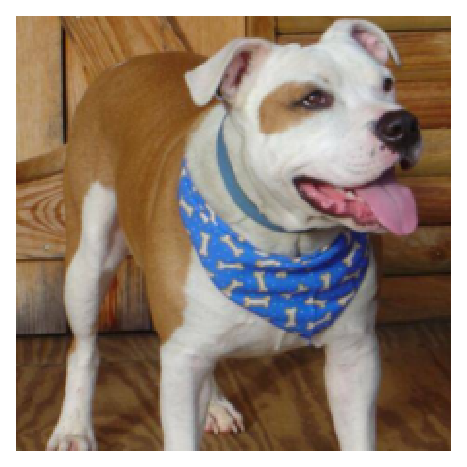

In [35]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False);

In [79]:
data_dir = './Cat_Dog_data/Cat_Dog_data/'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize(225),
                                        transforms.CenterCrop(224),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5]),
                                       transforms.ToTensor()])

test_transforms = train_transforms = transforms.Compose([transforms.Resize(225),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor()])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

## train example

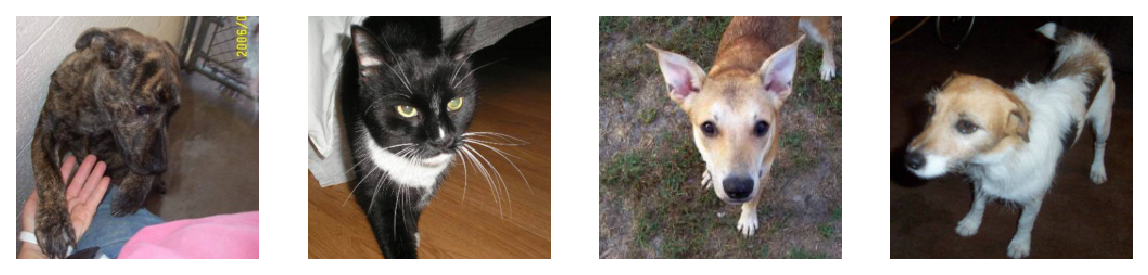

In [59]:
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=4)

for ii in range(4):
    ax=axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)    

## test example

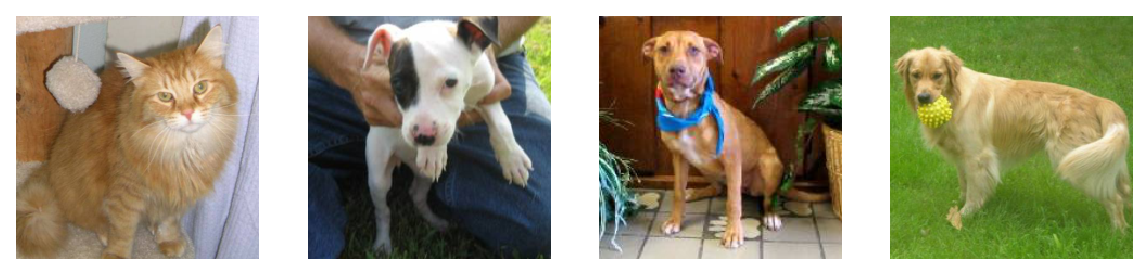

In [60]:
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=4)

for ii in range(4):
    ax=axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)    

In [90]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(150528,8192)
        self.fc2 = nn.Linear(8192, 4096)
        self.fc3 = nn.Linear(4096, 2048)
        self.fc4 = nn.Linear(2048, 1024)
        self.fc5 = nn.Linear(1024, 512)
        self.fc6 = nn.Linear(512, 256)
        self.fc7 = nn.Linear(256, 128)
        self.fc8 = nn.Linear(128, 64)
        self.fc9 = nn.Linear(64, 32)
        self.fc10 = nn.Linear(32, 16)
        self.fc11 = nn.Linear(16, 8)
        self.fc12 = nn.Linear(8, 4)
        self.fc13 = nn.Linear(4, 2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        x = F.log_softmax(self.fc13(x), dim=1)
        
        return x

In [91]:
model = Classifier()

images, labels = next(iter(trainloader))
ps = torch.exp(model(images))

print(ps.shape)

torch.Size([32, 2])


In [94]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class[:10, : ])

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]])


In [95]:
equal = top_class == labels

In [96]:
equal = top_class == labels.view(*top_class.shape)

In [97]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss= 0
        accuracy=0
        
        with torch.no_grad():
            for images, labels in testloader:
                log_ps= model(images)
                test_loss+= criterion(log_ps, labels) 
                
                ps= torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy+= torch.mean(equals.type(torch.FloatTensor))
                
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
                
                
                
                
        ## TODO: Implement the validation pass and print out the validation accuracy
        print(f'Accuracy: {accuracy.item()*100}%')

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 4932501504 bytes. Buy new RAM!
